# A Text Classification of Milwaukee Bucks's Fan Reactions

## Project Goal

The goal of this project is to evaluate the performances of different text classification methods on domain-specific social media data. The data used are comments from Milwaukee Bucks' fans in postgame Reddit threads. Models will be used to predict whether a comment follows a win or a loss. In doing so, one can get a better idea of how B

## Collecting and Preparing the Data

In [1]:
# Importing the Necessary Modules
from tqdm import tqdm
import pandas as pd
import numpy as np
# import praw
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import punkt

In [ ]:
# Accessing API
user_agent = "Scraper 1.0 by u/colloj"

reddit = praw.Reddit(client_id='-RlNNaCimqKKkJ_aX1FcKg',
                     client_secret='4vSZ7Dm4rtDYXevU8PtIiIK6dtD_Ng',
                     user_agent= user_agent)

In [ ]:
# Getting the Data
subreddit_name = 'MkeBucks'

# Define the string you want to search for in post titles
search_string = '[POSTGAME THREAD] Our Milwaukee Bucks'
start_date = '2023-10-23'

post_names = []
comments = []

for submission in reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene'):
    if '[POSTGAME THREAD]' in submission.title:
        print(submission.title)


In [ ]:
# Getting the Data
subreddit_name = 'MkeBucks'

# Define the string you want to search for in post titles
search_string = '[POSTGAME THREAD] Our Milwaukee Bucks'
start_date = '2023-10-23'

post_names = []
comments = []

total_submissions = len(list(reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene')))

for submission in tqdm(reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene'), total = total_submissions):
    if '[POSTGAME THREAD]' in submission.title:
        submission.comments.replace_more(limit=None)
        for comment in submission.comments.list():
            comments.append(comment.body)
            post_names.append(submission.title)

post_names, comments

In [ ]:
# Create a DataFrame from the lists
df = pd.DataFrame({'Post_Name': post_names, 'Comment': comments})

# Display the DataFrame
df.head()

In [ ]:
df.to_csv("bucks.csv", index = False)

In [2]:
df = pd.read_csv("bucks.csv")
df.head()

,Post_Name,Comment
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they..."
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh..."


In [3]:
# Getting the Dates
def get_after_last_space(string):
    return string.split(' ')[-1]
df["Date"] = df["Post_Name"].apply(get_after_last_space)
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,1/3/2024
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,1/3/2024
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",1/3/2024
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,1/3/2024
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",1/3/2024


In [4]:
df["Date"].unique()

array(['1/3/2024', '3/4/2024', '2/15/2024', '10/26/2023', '1/31/2024',
       '3/8/2024', '3/10/2024', '11/1/2023', '11/8/2023', '1/6/2024',
       '1/27/2024', '2/03/2024', '11/6/2023', '1/8/2024', '1/11/2024',
       '2/25/2024', '2/23/2024', '11/11/2023', '3/14/2024', '1/14/2024',
       '11/22/2023', '1/4/2024', '11/18/2023', '11/24/2023', '2/04/2024',
       '3/1/2024', '1/1/2024', '3/12/2024', '04/26/2023', '1/24/2024',
       '2/12/2024', '12/11/2023', '10/20/2023', '2/13/2024', '2/8/2024',
       '11/9/2023', '12/23/2023', '3/6/2024', '11/28/2023', '11/30/2023',
       '1/20/2024', '2/27/2024', '12/13/2023', '11/15/2023', '1/13/2024',
       '11/17/2023', '12/2/2023', '12/17/2023', '12/27/2023', '2/06/2024',
       '10/29/2023', '12/29/2023', '1/17/2024', '11/26/2023',
       '12/21/2023', '11/20/2023', '1/22/2024', '1/26/2024', '04/24/2023',
       '12/19/2023', '12/16/2023', '2/9/2024', '2/29/2024', '11/13/2023',
       '04/22/2023', '04/19/2023', '11/3/2023', '04/16/2023', '

In [5]:
df = df[df["Date"] != "round"]
df["Date"].unique()

array(['1/3/2024', '3/4/2024', '2/15/2024', '10/26/2023', '1/31/2024',
       '3/8/2024', '3/10/2024', '11/1/2023', '11/8/2023', '1/6/2024',
       '1/27/2024', '2/03/2024', '11/6/2023', '1/8/2024', '1/11/2024',
       '2/25/2024', '2/23/2024', '11/11/2023', '3/14/2024', '1/14/2024',
       '11/22/2023', '1/4/2024', '11/18/2023', '11/24/2023', '2/04/2024',
       '3/1/2024', '1/1/2024', '3/12/2024', '04/26/2023', '1/24/2024',
       '2/12/2024', '12/11/2023', '10/20/2023', '2/13/2024', '2/8/2024',
       '11/9/2023', '12/23/2023', '3/6/2024', '11/28/2023', '11/30/2023',
       '1/20/2024', '2/27/2024', '12/13/2023', '11/15/2023', '1/13/2024',
       '11/17/2023', '12/2/2023', '12/17/2023', '12/27/2023', '2/06/2024',
       '10/29/2023', '12/29/2023', '1/17/2024', '11/26/2023',
       '12/21/2023', '11/20/2023', '1/22/2024', '1/26/2024', '04/24/2023',
       '12/19/2023', '12/16/2023', '2/9/2024', '2/29/2024', '11/13/2023',
       '04/22/2023', '04/19/2023', '11/3/2023', '04/16/2023'],


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03


In [7]:
# Getting Data For This Season
df = df[df["Date"] >= "2023-10-26"]
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03


In [8]:
# Number of Games
len(df["Post_Name"].unique())

64

In [9]:
# Number of Columns
len(df)

12266

In [10]:
# Create the Result Column
def label_column(string):
    if any(word in string for word in ["defeat", "trounce", "beat"]):
        return "Win"
    elif any(word in string for word in ["fall", "sputter", "are defeated"]):
        return "Loss"
    else:
        return "Unknown"
df["Result"] = df["Post_Name"].apply(label_column)
df.head()

,Post_Name,Comment,Date,Result
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03,Loss
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03,Loss
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03,Loss
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03,Loss
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03,Loss


In [11]:
# Sorting Dataframe By Date
df = df.sort_values(by = "Date").reset_index(drop = True)

In [12]:
df.head()

,Post_Name,Comment,Date,Result
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win


### Prepare Comments for Modeling

In [13]:
# Tokenize, then rejoin
def tokenize(document):
    # YOUR CODE HERE
    document = document.split()
    
    for item in document:
        document = [re.sub(r'^\W+|\W+$', "", item) for item in document]
            
    document = [item.lower() for item in document]
    
    document = " ".join(document)
    
    return document

df["Comment_Adj"] = df["Comment"].apply(tokenize)
df.head()

,Post_Name,Comment,Date,Result,Comment_Adj
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,but have you considered damian lillard
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,help yourself to a dame flair
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,the most casual 30 point games in the nba ther...
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,dame regularly went nuclear with the most medi...
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,wait until you see him get hot from 3 and star...


In [14]:
# Remove Stopwords from Comments
def remove_stopwords(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df["No_Stop"] = df["Comment_Adj"].apply(remove_stopwords)
df.head()

,Post_Name,Comment,Date,Result,Comment_Adj,No_Stop
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,but have you considered damian lillard,considered damian lillard
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,help yourself to a dame flair,help dame flair
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,the most casual 30 point games in the nba ther...,casual 30 point games nba ’ good reason ’ obse...
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,dame regularly went nuclear with the most medi...,dame regularly went nuclear mediocre teams bla...
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,wait until you see him get hot from 3 and star...,wait see get hot 3 start shooting 35-40 ft sho...


In [15]:
# Perform Stemming on Comments
stemmer = PorterStemmer()
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming function to text_column
df['Stemmed'] = df['No_Stop'].apply(stem_text)
df.head()

,Post_Name,Comment,Date,Result,Comment_Adj,No_Stop,Stemmed
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,but have you considered damian lillard,considered damian lillard,consid damian lillard
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,help yourself to a dame flair,help dame flair,help dame flair
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,the most casual 30 point games in the nba ther...,casual 30 point games nba ’ good reason ’ obse...,casual 30 point game nba ’ good reason ’ obses...
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,dame regularly went nuclear with the most medi...,dame regularly went nuclear mediocre teams bla...,dame regularli went nuclear mediocr team blaze...
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,wait until you see him get hot from 3 and star...,wait see get hot 3 start shooting 35-40 ft sho...,wait see get hot 3 start shoot 35-40 ft shot l...


In [16]:
# Win_Loss Function

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Result_Bin'] = label_encoder.fit_transform(df['Result'])
df.head()

,Post_Name,Comment,Date,Result,Comment_Adj,No_Stop,Stemmed,Result_Bin
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,but have you considered damian lillard,considered damian lillard,consid damian lillard,1
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,help yourself to a dame flair,help dame flair,help dame flair,1
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,the most casual 30 point games in the nba ther...,casual 30 point games nba ’ good reason ’ obse...,casual 30 point game nba ’ good reason ’ obses...,1
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,dame regularly went nuclear with the most medi...,dame regularly went nuclear mediocre teams bla...,dame regularli went nuclear mediocr team blaze...,1
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,wait until you see him get hot from 3 and star...,wait see get hot 3 start shooting 35-40 ft sho...,wait see get hot 3 start shoot 35-40 ft shot l...,1


## Naive Bayes Model 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB

X = df["Stemmed"]
y = df["Result_Bin"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = make_pipeline(CountVectorizer(), BernoulliNB())

In [19]:
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6985769728331178


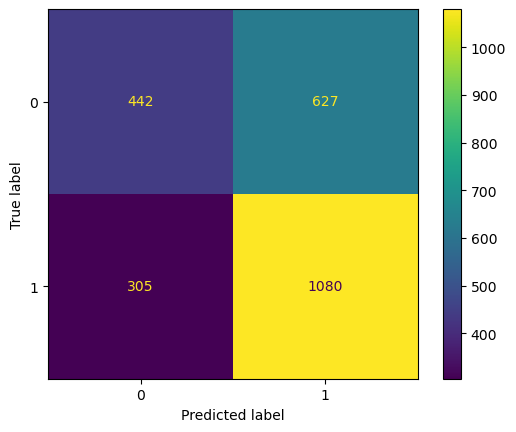

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

## Logistic Regression Model 

In [21]:
vec = CountVectorizer()
X_train_1 = vec.fit_transform(X_train)
X_test_1 = vec.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_1, y_train)
y_pred_lr = lr.predict(X_test_1)

f1 = f1_score(y_test, y_pred_lr)
print("F1 Score:", f1)

F1 Score: 0.6874343717185859


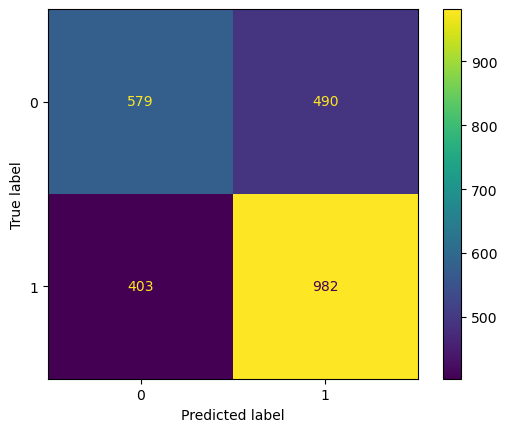

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

## Convolutional Neural Network

#### Hyperparameter Tuning

In [24]:
# Importing the Necessary Libraries
import tensorflow as tf
import keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout

In [25]:
# Tokenizing the Dataset
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_2 = tokenizer.texts_to_sequences(X_train)
X_test_2 = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200
X_train_2 = pad_sequences(X_train_2, padding='post', maxlen=maxlen)
X_test_2 = pad_sequences(X_test_2, padding='post', maxlen=maxlen)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [26]:
# Building the initial model
def CNN_model(embedding = 200, filter = 16, kernel = 4, pool = 2, num_1 = 40, lr = 0.01, dropout_rate = 0.5):
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                               output_dim=embedding, 
                               input_length=maxlen))
    model.add(Conv1D(filters = filter, kernel_size = kernel, activation = "relu"))
    model.add(MaxPooling1D(pool_size = pool))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_1, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer= Adam(learning_rate = lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = CNN_model()

history = model.fit(X_train_2, y_train,
                    epochs=30,
                    verbose=False,
                    validation_data=(X_test_2, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train_2, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_2, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

2024-04-18 08:46:15.907496: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Training Accuracy: 0.9775
Testing Accuracy:  0.6002


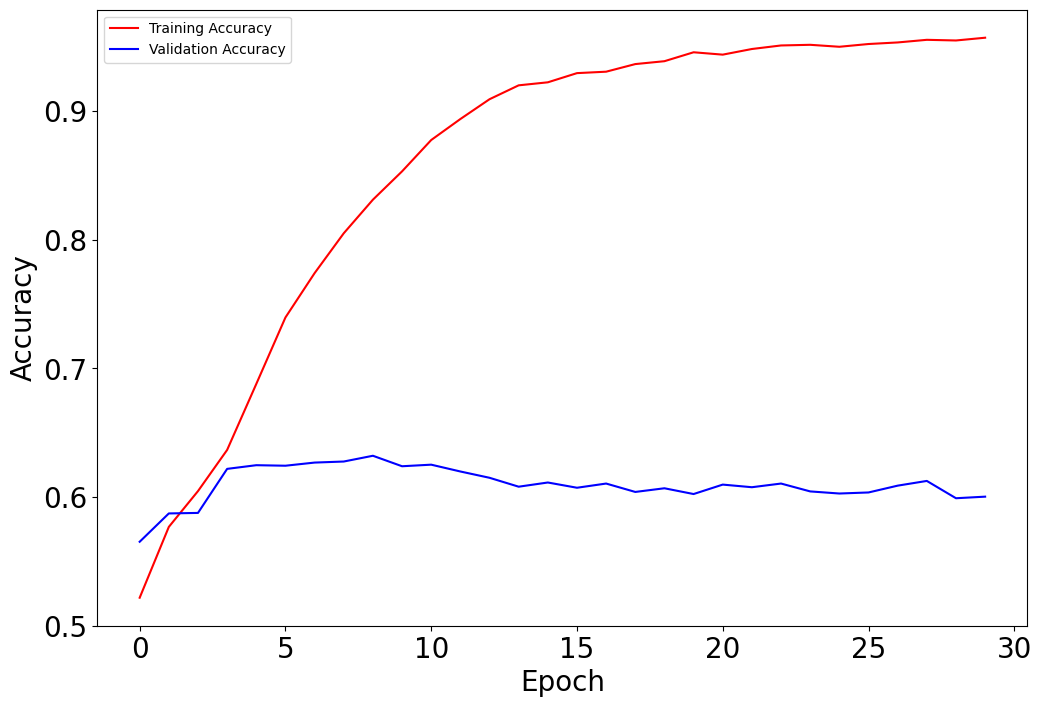

In [27]:
# Plot Accuracy Over Number of Epochs

fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(history.history['accuracy'], 'r', label='Training Accuracy')
ax.plot(history.history['val_accuracy'], 'b' ,label='Validation Accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [28]:
from sklearn.model_selection import GridSearchCV

def CNN_model(embedding = 200, filter = 16, kernel = 4, num_1 = 40, lr = 0.01, dropout_rate = 0.5):
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                               output_dim=embedding, 
                               input_length=maxlen))
    model.add(Conv1D(filters = filter, kernel_size = kernel, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_1, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer= Adam(learning_rate = lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = CNN_model()

param_grid = {
    'filter': [24, 36],
    'kernel': [4,5,6],
    'num_1': [60, 80, 100],
    'lr': [0.01, 0.001],
    'dropout_rate': [0.4, 0.5, 0.6]
}

model = KerasClassifier(build_fn=CNN_model, verbose=0)

# Perform GridSearchCV
search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose = 2)
search_results = search.fit(X_train_2, y_train)

# Get the best score and best parameters
best_score = search_results.best_score_
best_params = search_results.best_params_

print("Best score is {:.2f} using {}".format(best_score, best_params))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/var/folders/hs/br_4rpdj68nc3sfdpgv0xgn80000gn/T/ipykernel_74732/2346769631.py:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=CNN_model, verbose=0)
2024-04-18 08:48:32.894289: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 08:48:32.894792: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 08:48:32.901589: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 08:48:32.902734: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 08:48:32.903000: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-18 08:48:32.904463: W tensorflow/tsl/platform/profile_utils

103/103 [==============================] - 2s 14ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.01, num_1=60; total time=  23.7s
103/103 [==============================] - 1s 9ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.01, num_1=100; total time=  23.4s
103/103 [==============================] - 1s 11ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=4, lr=0.001, num_1=100; total time=  22.1s
103/103 [==============================] - 2s 22ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=5, lr=0.01, num_1=80; total time=  24.6s
103/103 [==============================] - 1s 11ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=5, lr=0.01, num_1=100; total time=  26.6s
103/103 [==============================] - 2s 15ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=5, lr=0.001, num_1=80; total time=  28.3s
103/103 [==============================] - 3s 21ms/step
[CV] END dropout_rate=0.4, filter=24, kernel=6, lr=0.01, num_1=60; total time=  29.4s
10

In [30]:
best_model = CNN_model(num_1=best_params['num_1'], lr=best_params['lr'],
                      kernel = best_params["kernel"], filter = best_params["filter"], dropout_rate = best_params["dropout_rate"])
best_model.fit(X_train_2, y_train, epochs=30, batch_size=1000, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)

Epoch 1/30
8/8 [==============================] - 3s 269ms/step - loss: 0.6876 - accuracy: 0.5537 - val_loss: 0.6832 - val_accuracy: 0.5818
Epoch 2/30
8/8 [==============================] - 2s 280ms/step - loss: 0.6798 - accuracy: 0.5714 - val_loss: 0.6781 - val_accuracy: 0.5767
Epoch 3/30
8/8 [==============================] - 2s 277ms/step - loss: 0.6687 - accuracy: 0.5978 - val_loss: 0.6699 - val_accuracy: 0.5869
Epoch 4/30
8/8 [==============================] - 2s 302ms/step - loss: 0.6410 - accuracy: 0.6515 - val_loss: 0.6607 - val_accuracy: 0.6047
Epoch 5/30
8/8 [==============================] - 2s 290ms/step - loss: 0.5844 - accuracy: 0.7276 - val_loss: 0.6434 - val_accuracy: 0.6363
Epoch 6/30
8/8 [==============================] - 2s 278ms/step - loss: 0.5024 - accuracy: 0.7731 - val_loss: 0.6409 - val_accuracy: 0.6566
Epoch 7/30
8/8 [==============================] - 2s 287ms/step - loss: 0.4178 - accuracy: 0.8177 - val_loss: 0.6900 - val_accuracy: 0.6353
Epoch 8/30
8/8 [====

ValueError: in user code:

    File "/opt/anaconda3/envs/testenv/lib/python3.9/site-packages/keras/engine/training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/envs/testenv/lib/python3.9/site-packages/keras/engine/training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/envs/testenv/lib/python3.9/site-packages/keras/engine/training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "/opt/anaconda3/envs/testenv/lib/python3.9/site-packages/keras/engine/training.py", line 1756, in test_step
        y_pred = self(x, training=False)
    File "/opt/anaconda3/envs/testenv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'conv1d_3' (type Conv1D).
    
    Negative dimension size caused by subtracting 6 from 1 for '{{node sequential_3/conv1d_3/Conv1D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_3/conv1d_3/Conv1D/ExpandDims, sequential_3/conv1d_3/Conv1D/ExpandDims_1)' with input shapes: [?,1,1,200], [1,6,200,24].
    
    Call arguments received by layer 'conv1d_3' (type Conv1D):
      • inputs=tf.Tensor(shape=(None, 1, 200), dtype=float32)


[CV] END dropout_rate=0.6, filter=36, kernel=6, lr=0.001, num_1=60; total time=  43.6s
[CV] END dropout_rate=0.6, filter=36, kernel=6, lr=0.001, num_1=60; total time=  44.2s
[CV] END dropout_rate=0.6, filter=36, kernel=6, lr=0.001, num_1=80; total time=  43.6s
[CV] END dropout_rate=0.6, filter=36, kernel=6, lr=0.001, num_1=80; total time=  43.7s
[CV] END dropout_rate=0.6, filter=36, kernel=6, lr=0.001, num_1=100; total time=  43.7s
[CV] END dropout_rate=0.6, filter=36, kernel=6, lr=0.001, num_1=80; total time=  43.8s


### Bert Model

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.layers import Input

In [ ]:
# Import the model

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name)

In [ ]:
# Tokenize the Data

def tokenize_text(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=200, return_tensors='tf')

In [ ]:
X = df['Comment'].tolist()
y = df['Result_Bin'].values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tokens = tokenizer(X_train, padding=True, truncation=True, max_length=200, return_tensors='tf')
X_val_tokens = tokenizer(X_val, padding=True, truncation=True, max_length=200, return_tensors='tf')

In [ ]:
input_ids = Input(shape=(200,), dtype='int32')
attention_mask = Input(shape=(200,), dtype='int32')

In [ ]:
bert_output = model(input_ids, attention_mask=attention_mask)[0]
pooled_output = GlobalMaxPooling1D()(bert_output)
pooled_output = Dropout(0.1)(pooled_output)
output = Dense(1, activation='sigmoid')(pooled_output)

model = Model(inputs=[input_ids, attention_mask], outputs=output)

In [ ]:
model.compile(optimizer=Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit([X_train_tokens['input_ids'], X_train_tokens['attention_mask']], y_train,
                    validation_data=([X_val_tokens['input_ids'], X_val_tokens['attention_mask']], y_val),
                    epochs=3, batch_size=32)